In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import date
import math
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=cc3910ec254912e37b1ad58f90a9a8b72bae7db84f1f53594ab3a8598e9d427f
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
start = '2010-01-01'
today = '2022-01-01'

df = yf.download('AAPL', start , today)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()
# df = df.drop(['Date', 'Adj Close'], axis = 1)

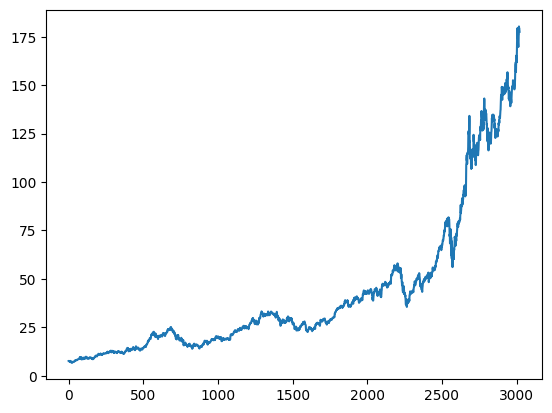

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
3020    154.6399
Name: Close, Length: 3021, dtype: float64

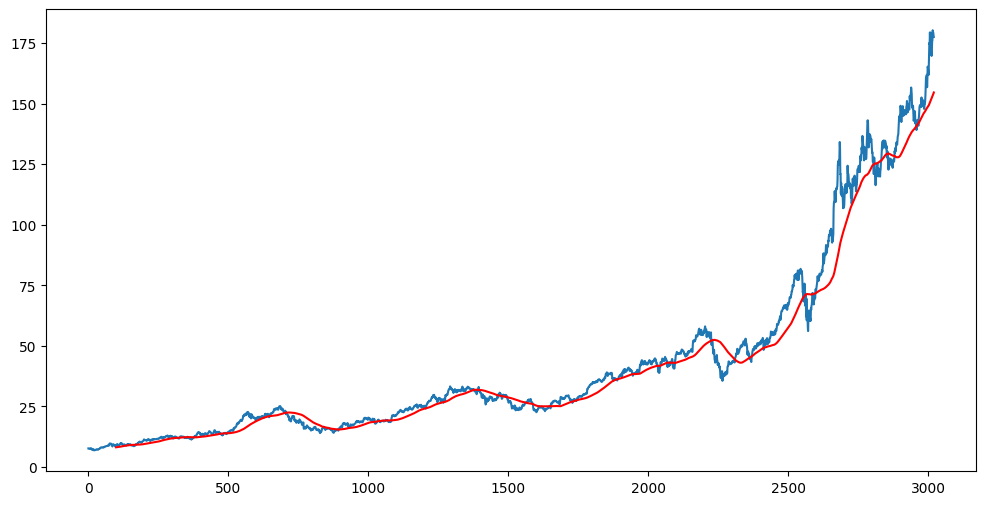

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [ ]:
ma200 = df.Close.rolling(200).mean()

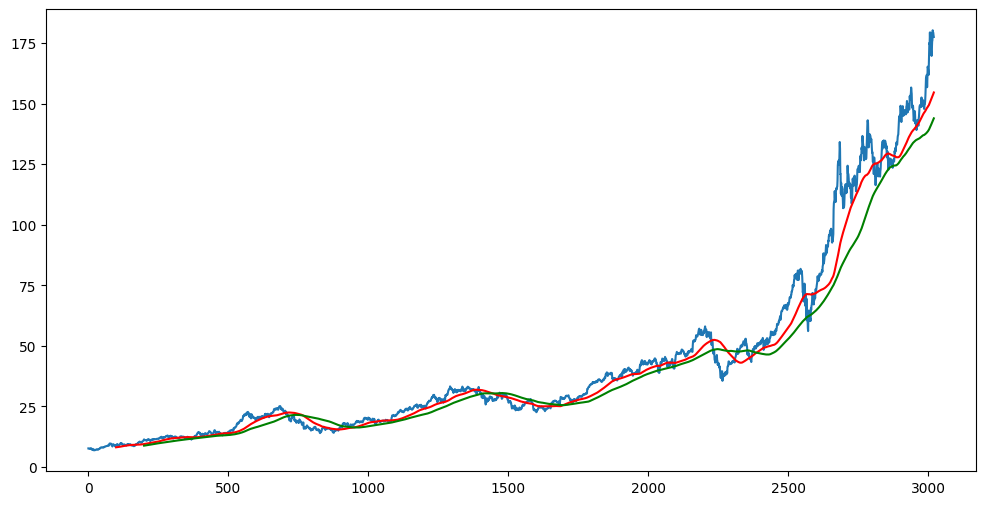

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [ ]:
df.shape

(3021, 7)

In [ ]:
data_training = pd.DataFrame(df['Close'][0:math.floor(int(len(df))*0.70)])
data_testing = pd.DataFrame(df['Close'][math.floor(int(len(df))*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(907, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#M1 
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (100, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
#M1
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 21s 232ms/step - loss: 0.0689
Epoch 2/50
63/63 [==============================] - 21s 337ms/step - loss: 0.0163
Epoch 3/50
63/63 [==============================] - 21s 338ms/step - loss: 0.0126
Epoch 4/50
63/63 [==============================] - 14s 230ms/step - loss: 0.0104
Epoch 5/50
63/63 [==============================] - 15s 235ms/step - loss: 0.0103
Epoch 6/50
63/63 [==============================] - 16s 254ms/step - loss: 0.0096
Epoch 7/50
63/63 [==============================] - 15s 231ms/step - loss: 0.0086
Epoch 8/50
63/63 [==============================] - 16s 261ms/step - loss: 0.0094
Epoch 9/50
63/63 [==============================] - 15s 232ms/step - loss: 0.0081
Epoch 10/50
63/63 [==============================] - 15s 247ms/step - loss: 0.0076
Epoch 11/50
63/63 [==============================] - 14s 229ms/step - loss: 0.0075
Epoch 12/50
63/63 [==============================] - 15s 240ms/step - loss: 0.0068
Epoch 13/50
6

In [ ]:
#M1
model.save('m100m200keras_model.h5')

In [ ]:
from keras.models import load_model
model1= load_model('keras_model.h5')

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing],axis=0, ignore_index = True)


In [ ]:
input_data = scaler.fit_transform(final_df)


In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [ ]:
y_test1 = []
past_100_days_testing = data_testing.tail(100)
temp = np.reshape(past_100_days_testing.values, (1, 100, 1))
a = 100
days = 0

while days<30:
  if a == 100:
    y_predicted1 = model.predict(temp)
    # print('100')
    # value = y_predicted1[0][0]
    # print(value)
    y_test1.append(y_predicted1[0])
    temp = np.append(temp, [y_predicted1], axis=1)
    days = days+1
    a = 101
  else:
    # print('101')
    temp = np.delete(temp, 0, axis=1)
    a = 100
    

y_test1 = np.array(y_test1)
# y_test1
# print(days)

1/1 [==============================] - 0s 42ms/step


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
y_predicted = model.predict(x_test)
# y_predicted

29/29 [==============================] - 2s 59ms/step


In [ ]:
scaler.scale_

array([0.00690691])

In [ ]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
y_test1 = y_test1 * scale_factor

In [ ]:
y_predicted.shape
 

(907, 1)

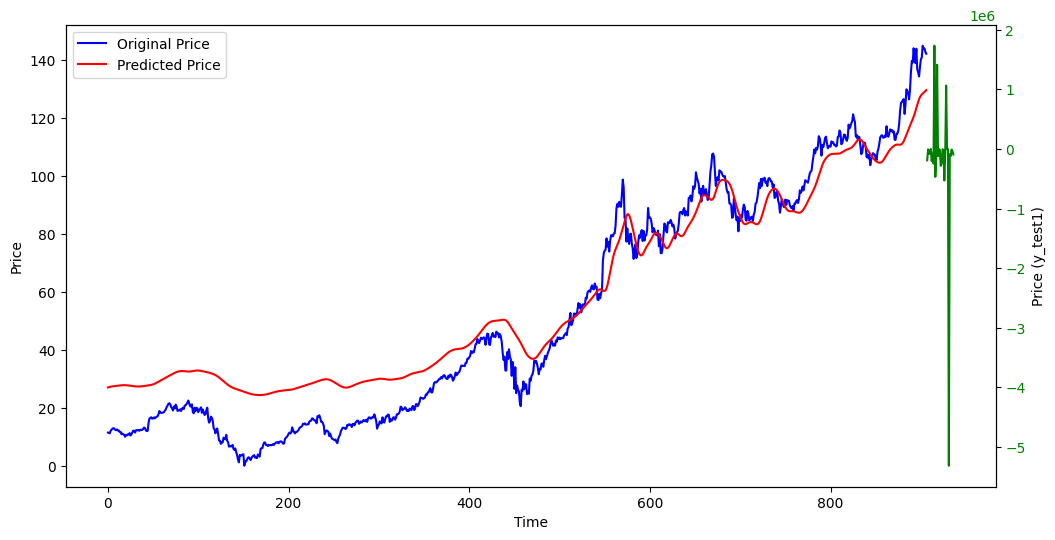

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# plot y_test and y_predicted on the first y-axis
ax1.plot(y_test, 'b', label='Original Price')
ax1.plot(y_predicted, 'r', label='Predicted Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')
ax1.legend()

# create a second y-axis on the same plot
ax2 = ax1.twinx()

# plot y_test1 on the second y-axis
ab = np.vstack((y_predicted, y_test1))
ab[:len(y_predicted), :] = np.nan
ax2.plot(ab,'g')
ax2.set_ylabel('Price (y_test1)')
ax2.tick_params(axis='y', labelcolor='g')

# ax1.axvline(x=len(y_predicted)-0.5, color='black', linestyle='dashed')
# ax1.axvline(x=len(y_predicted)+0.5, color='black', linestyle='dashed')

plt.show()


In [ ]:
%%writefile app_LSTM.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import date
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import streamlit as st

st.title('Stock Trend Prediction')
start = '2010-01-01'
today = date.today().strftime("%Y-%m-%d")

user_input = st.text_input("Enter Stock Ticker", 'AAPL')
df = yf.download(user_input, start , today)

st.subheader("Data Overview")
st.write(df.describe())

st.subheader('Closing Prive vs Time chart')
fig = plt.figure(figsize = (12,6))
plt.plot(df.Close)
st.pyplot(fig)

st.subheader('Closing Prive vs Time chart with 100MA')
ma100 = df.Close.rolling(100).mean()
fig = plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100)
st.pyplot(fig)

st.subheader('Closing Prive vs Time chart with 100MA & 200MA')
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
fig = plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100)
plt.plot(ma200)
st.pyplot(fig)

data_training = pd.DataFrame(df['Close'][0:math.floor(int(len(df))*0.70)])
data_testing = pd.DataFrame(df['Close'][math.floor(int(len(df))*0.70):int(len(df))])

scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

model= load_model('keras_model.h5')

past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing],axis=0, ignore_index = True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i ])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
y_predicted = model.predict(x_test)

scaler = scaler.scale_

scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

st.subheader('Predictions vs Original')
fig2 = plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig2)

x_input=x_test[len(x_test)-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=100
i=0
days = st.number_input("Enter number of days: ", 30)
while(i<days):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model1.predict(x_input)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model1.predict(x_input)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

day_new = np.arange(1, 101)
day_pred = np.arange(101, days + 101)

st.subheader('Closing Prive vs Time chart showing future predictions')
fig3, ax = plt.subplots(figsize=(12, 6))
ax.plot(day_new, scaler.inverse_transform(df[len(df)-100:]))
ax.plot(day_pred, scaler.inverse_transform(lst_output)) 
ax.set_xlabel('Time')
ax.set_ylabel('Closing Price')
ax.legend(['Actual Price', 'Predicted Price'])
st.pyplot(fig3)

Overwriting app_LSTM.py


In [ ]:
!streamlit run app_LSTM.py & npx localtunnel --port 8501

[############......] | finalize:follow-redirects: sill finalize /root/.npm/_npx


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.139.174:8501

npx: installed 22 in 2.6s
your url is: https://spotty-dragons-invite-34-141-139-174.loca.lt
2023-03-30 22:02:15.765405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[*********************100%***********************]  1 of 1 completed
2023-03-30 22:02:20.530979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
32/32 [==============================] - 2s 36ms/step
2023-03-30 22:02:25.854 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 565, in _run_script
    exec(code, module.__dict__)
  File "/content/app_LSTM.py"